In [1]:
import numpy as np
import matplotlib.pyplot as plt
from edfio import read_edf
from muniverse.algorithms import decompose_recording

In [2]:
data_path = "/Users/pm1222/Work/projects/muniverse/data/Caillet_et_al_2023/sub-01/emg/sub-01_task-isometric-30-percent-mvc_run-01_emg.edf"
cbss_config = "/Users/pm1222/Work/projects/muniverse/configs/cbss.json"

In [3]:
raw = read_edf(data_path)
n_channels = raw.num_signals
data = np.stack([raw.signals[i].data for i in range(n_channels)])

In [7]:
import json

with open(cbss_config, "r") as f:
    algorithm_config = json.load(f)

algorithm_config['Config']['start_time'] = 15
algorithm_config['Config']['end_time'] = 20
algorithm_config['Config']['sampling_frequency'] = 2048.0
algorithm_config['Config']['opt_max_iter'] = 10

spiketrains, metadata = decompose_recording(
    data[::4], 
    method='cbss',
    algorithm_config=algorithm_config,
)

[INFO] CBSS decomposition completed successfully


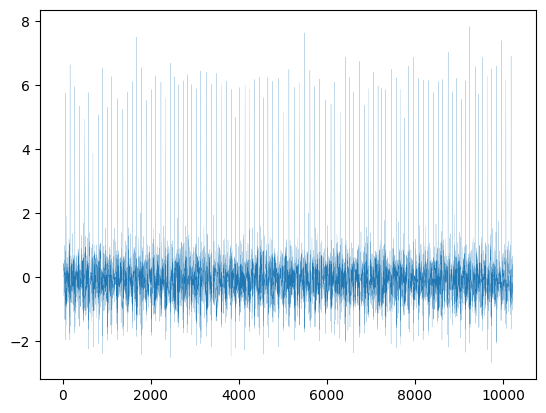

In [8]:
plt.plot(spiketrains['sources'][6], linewidth=0.1)

In [11]:
import pickle

with open("/Users/pm1222/Downloads/MUAPS Data List 48EL Processed.pkl", "rb") as f:
    data = pickle.load(f)

In [24]:
data[10000].shape

(48, 9)